## **PCA en Wines dataset**

#### Manuel Sánchez-Montañés

First we import the libraries we will need. In addition we will use the first code cell to activate the *inline* mode for the graphics generated by *matplotlib*. We also initialize the seed of the random generator.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Load**

Now we will use PCA in a wine database. There are 3 types of wine and 13 wine features with the levels of the most important indicators:
- Alcohol
- Malic acid
- Ash
- Ash alcalinity
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280_OD315
- Proline

Now we load this database:


In [2]:
from sklearn.datasets import load_wine

aux = load_wine()
data = pd.DataFrame(aux["data"], columns=aux["feature_names"])
data.insert(0, "Type", aux["target"])
data["Type"] = data["Type"].map({0:"A", 1:"B", 2:"C"})
data

,Type,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,A,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,A,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,A,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,A,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,A,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,C,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,C,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,C,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,C,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [3]:
print('\033[1m' + 'Wine Database\n', '\033[0m')
print('Número de clases reales (tipos de vino):', data['Type'].nunique())
print('Clases diferentes:', np.unique(data['Type']))
print('\nMuestra aleatoria de 10 vinos:\n')
data.sample(10)

Wine Database
 
Número de clases reales (tipos de vino): 3
Clases diferentes: ['A' 'B' 'C']

Muestra aleatoria de 10 vinos:



,Type,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
121,B,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0
149,C,13.08,3.90,2.36,21.5,113.0,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550.0
72,B,13.49,1.66,2.24,24.0,87.0,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472.0
51,A,13.83,1.65,2.60,17.2,94.0,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265.0
7,A,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
100,B,12.08,2.08,1.70,17.5,97.0,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710.0
45,A,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0
84,B,11.84,0.89,2.58,18.0,94.0,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520.0
77,B,11.84,2.89,2.23,18.0,112.0,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500.0
145,C,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0


## **Data Description**

In [4]:
data.describe().T[["count", "min", "max", "mean", "std"]]

,count,min,max,mean,std
alcohol,178.0,11.03,14.83,13.000618,0.811827
malic_acid,178.0,0.74,5.80,2.336348,1.117146
ash,178.0,1.36,3.23,2.366517,0.274344
alcalinity_of_ash,178.0,10.60,30.00,19.494944,3.339564
magnesium,178.0,70.00,162.00,99.741573,14.282484
total_phenols,178.0,0.98,3.88,2.295112,0.625851
flavanoids,178.0,0.34,5.08,2.029270,0.998859
nonflavanoid_phenols,178.0,0.13,0.66,0.361854,0.124453
proanthocyanins,178.0,0.41,3.58,1.590899,0.572359
color_intensity,178.0,1.28,13.00,5.058090,2.318286


## **Data Exploration**

In [5]:
X = data.drop("Type", axis=1)
y = data["Type"]

classes_names = data['Type'].unique()
print(classes_names)
attribute_names = X.columns
print(attribute_names)

['A' 'B' 'C']
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


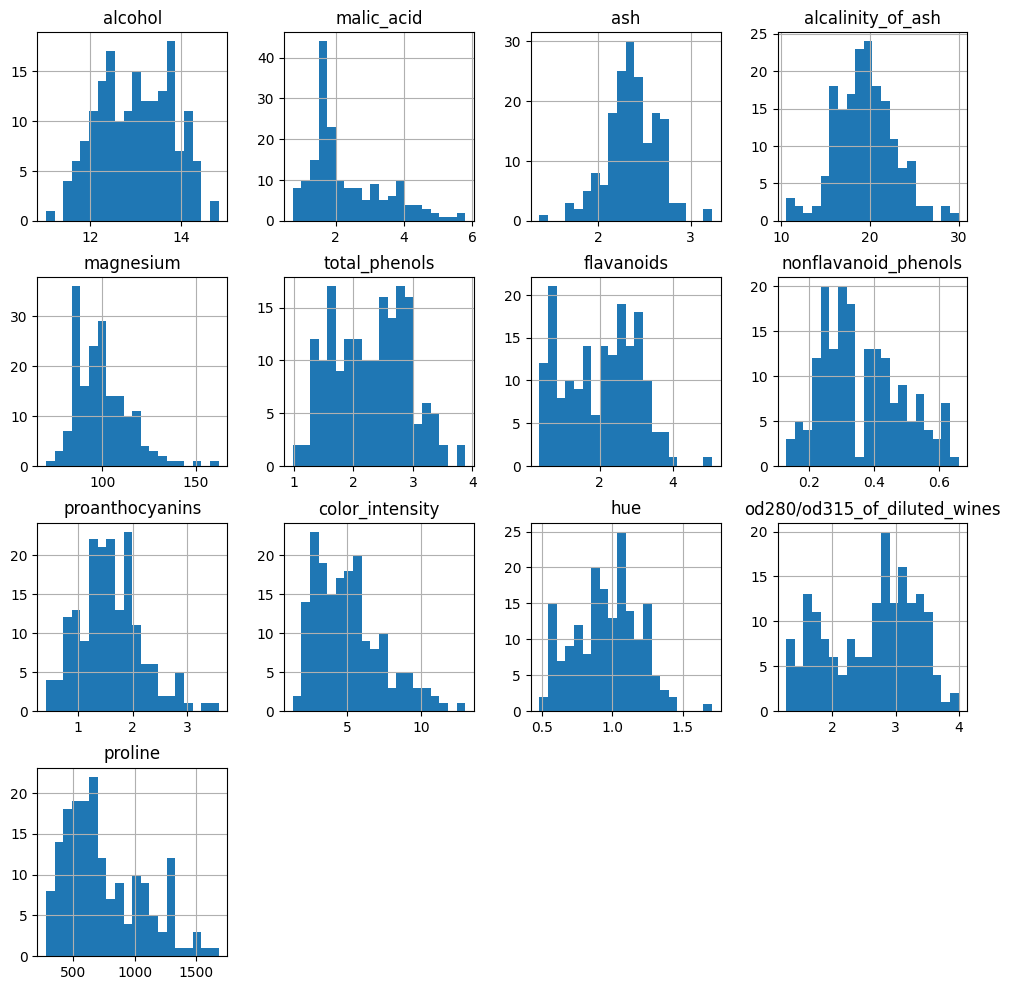

In [6]:
data.hist(bins=20, figsize=(12,12), layout=(-1,4));

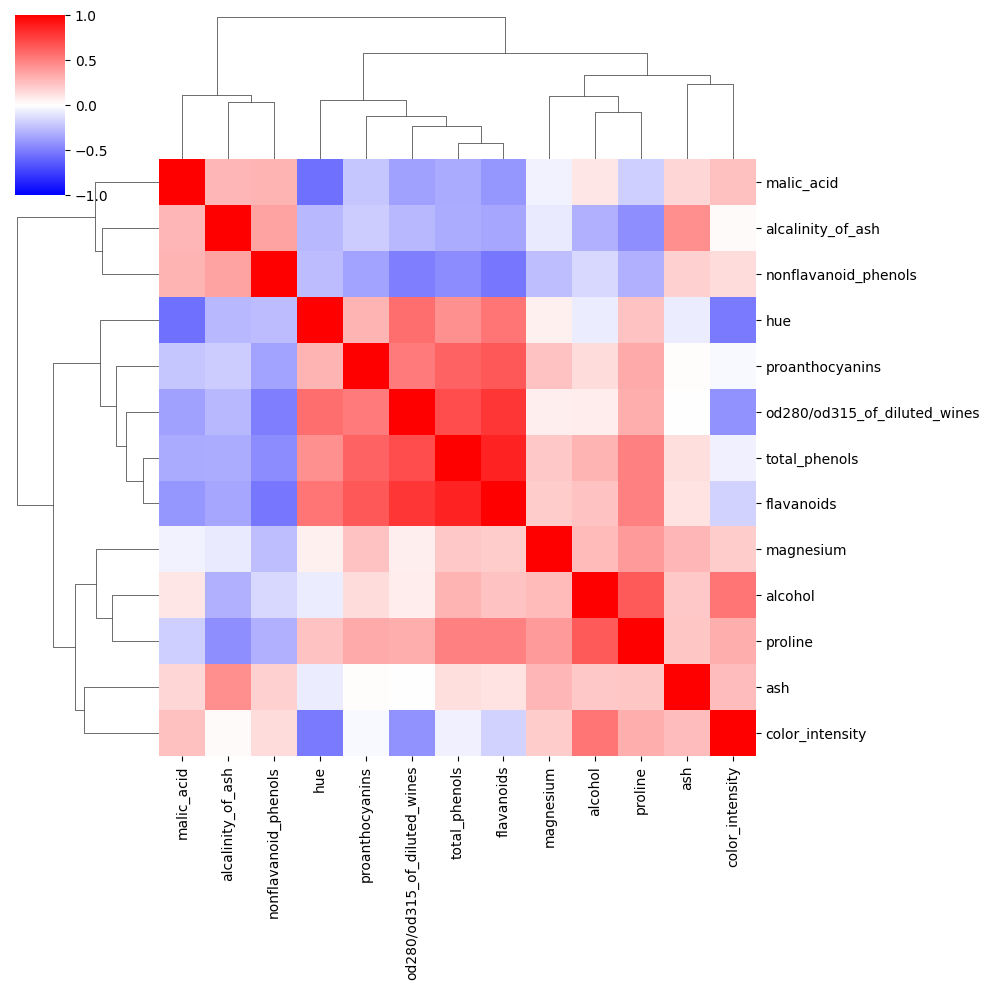

In [7]:
sns.clustermap(X.corr(), cmap="bwr", vmin=-1, vmax=1);

# **PCA**

After loading the database we need to do some basic preprocessing: standarization and PCA:

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_std = StandardScaler().fit_transform(X)
#X_std = X
X_std.var(axis=0).round(3)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
pca = PCA()
X_pca = pca.fit_transform(X_std)
# equivalente a:
#pca.fit(X_std)
#X_pca = pca.transform(X_std)

print(X.shape)
print(X_std.shape)
print(X_pca.shape)

(178, 13)
(178, 13)
(178, 13)


In [10]:
(4.732+2.511)/(13*1.)

0.5571538461538462

In [11]:
X_pca[:,0].var()

4.705850252990423

In [12]:
print()
print('-- Estadísticas de los datos proyectados en las componentes principales --')
print()
#pd.DataFrame(X_pca).describe()

for i in range(X_pca.shape[1]):
    print("* Datos en componente principal", i+1, ":")
    print("  - Media    :", X_pca[:,i].mean().round(3))
    print("  - Varianza :", X_pca[:,i].var(ddof=1).round(3))
    print("  - Autovalor:", pca.explained_variance_[i].round(3))
    print("  - Varianza explicada:", (100*pca.explained_variance_ratio_[i]).round(3), "%")
    print()

# IMPORTANT: note that we have used all the patterns in the dataset
# to fit the parameters of StandardScaler and PCA
# This is ONLY ok if we are NOT going to develop a predictive model
# for "y" using this data (in that case, we would use both training and test
# data for fitting the parameters, and using test data for fitting is forbidden!)
#
# If we were going to develop a model for predicting the value
# of a target variable "y" (classification / regression problem),
# first we would need to split the dataset in training and test sets:
#
# testsize = 0.2
# Xaux_train, Xaux_test, y_train, y_test = train_test_split(Xaux, y, test_size=testsize)
#
# and both the normalization and PCA should be fitted using only the training set:
#
# std_scaler = StandardScaler()
# std_scaler.fit(Xaux_train)
# X_std_train = std_scaler.transform(Xaux_train)
# pca = PCA(n_components=2)
# pca.fit(X_std_train)
# X_train = pca.transform(X_std_train)
#
# X_std_test = std_scaler.transform(Xaux_test)
# X_test = pca.transform(X_std_test)


-- Estadísticas de los datos proyectados en las componentes principales --

* Datos en componente principal 1 :
  - Media    : 0.0
  - Varianza : 4.732
  - Autovalor: 4.732
  - Varianza explicada: 36.199 %

* Datos en componente principal 2 :
  - Media    : 0.0
  - Varianza : 2.511
  - Autovalor: 2.511
  - Varianza explicada: 19.207 %

* Datos en componente principal 3 :
  - Media    : 0.0
  - Varianza : 1.454
  - Autovalor: 1.454
  - Varianza explicada: 11.124 %

* Datos en componente principal 4 :
  - Media    : -0.0
  - Varianza : 0.924
  - Autovalor: 0.924
  - Varianza explicada: 7.069 %

* Datos en componente principal 5 :
  - Media    : -0.0
  - Varianza : 0.858
  - Autovalor: 0.858
  - Varianza explicada: 6.563 %

* Datos en componente principal 6 :
  - Media    : -0.0
  - Varianza : 0.645
  - Autovalor: 0.645
  - Varianza explicada: 4.936 %

* Datos en componente principal 7 :
  - Media    : -0.0
  - Varianza : 0.554
  - Autovalor: 0.554
  - Varianza explicada: 4.239 %

* Dato

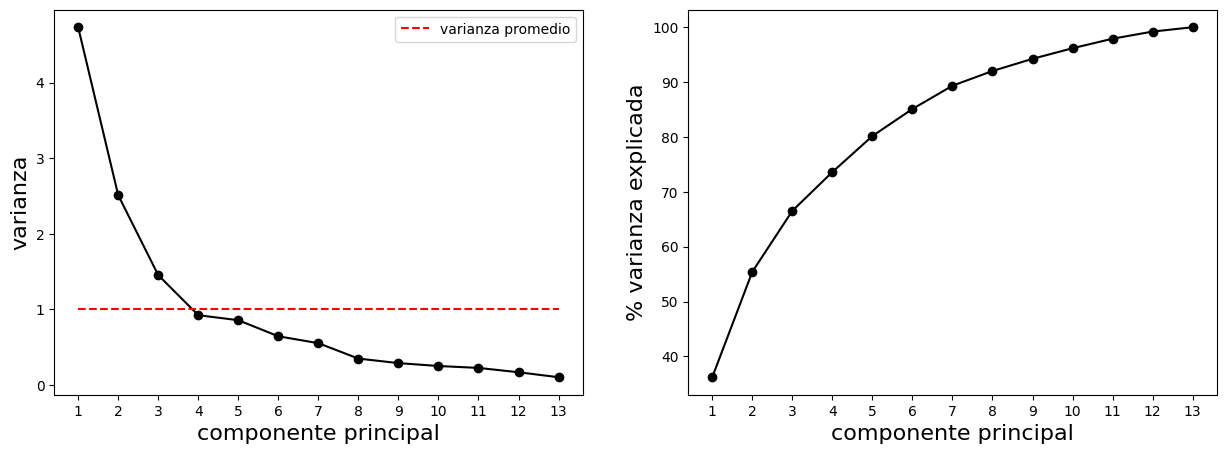

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(1,pca.n_components_+1), pca.explained_variance_, '-ok')
plt.plot([1,pca.n_components_], [1,1], '--r', label='varianza promedio')
plt.legend()
plt.xlabel('componente principal', fontsize=16)
plt.ylabel('varianza', fontsize=16)
plt.xticks(range(1,pca.n_components_+1))

plt.subplot(1,2,2)
plt.plot(range(1,pca.n_components_+1),
         100*pca.explained_variance_ratio_.cumsum(), '-ok')
plt.xlabel('componente principal', fontsize=16)
plt.ylabel('% varianza explicada', fontsize=16)
plt.xticks(range(1,pca.n_components_+1));

In [14]:
pcs_names = ['componente principal '+str(i+1) for i in range(pca.n_components_)]
pcs_names

['componente principal 1',
 'componente principal 2',
 'componente principal 3',
 'componente principal 4',
 'componente principal 5',
 'componente principal 6',
 'componente principal 7',
 'componente principal 8',
 'componente principal 9',
 'componente principal 10',
 'componente principal 11',
 'componente principal 12',
 'componente principal 13']

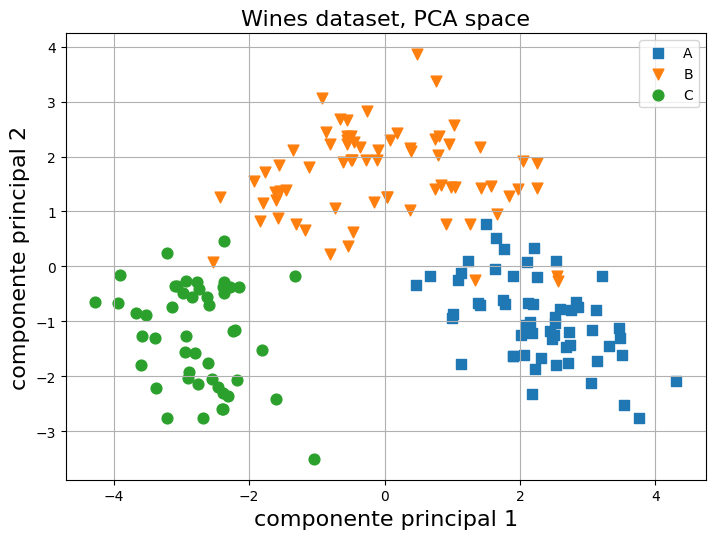

In [15]:
pc_x = 0
pc_y = 1

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['s', 'v', 'o', 'd', 's', 'v', 'o', 'd', 's']

fig = plt.figure(figsize=(7,5))
for label,color,marker in zip(classes_names,colors,markers):
    inds = np.where(y == label)[0]
    plt.scatter(X_pca[inds, pc_x],
                X_pca[inds, pc_y],
                s = 60,
                c = color,
                marker = marker,
                alpha = 1.0,
                cmap='RdYlGn',
                label = label)

plt.legend(); plt.grid(); plt.tight_layout()
plt.title('Wines dataset, PCA space', fontsize=16)
plt.xlabel(pcs_names[pc_x], fontsize=16)
plt.ylabel(pcs_names[pc_y], fontsize=16);

In [16]:
def PCA_plot(X_std, y, attribute_names, classes_names,
             colors, markers, pca, pcs_names,
             ax, pc_x=0, pc_y=1):
    X_pca = pca.transform(X_std)
    for label,color,marker in zip(classes_names,colors,markers):
        inds = np.where(y == label)[0]
        plt.scatter(X_pca[inds, pc_x],
                    X_pca[inds, pc_y],
                    s = 60,
                    c = color,
                    marker = marker,
                    alpha = 1.0,
                    cmap='RdYlGn',
                    label = label)
    factor = 6*np.sqrt(np.max(np.cov(X_std,rowvar=False)))
    aux = np.eye(len(attribute_names))
    attributes_PCA = pca.transform(aux)
    for a,name in zip(attributes_PCA,attribute_names):
        ax.arrow(0, 0, a[pc_x]*factor, a[pc_y]*factor,
                 head_width=1/4*0.05*factor*1.5,
                 head_length=1/4*0.1*factor*1.5, fc='k', ec='k')
        plt.text(a[pc_x]*factor, a[pc_y]*factor, name, color='r')

    plt.legend(); plt.grid(); plt.tight_layout()
    plt.xlabel(pcs_names[pc_x], fontsize=16)
    plt.ylabel(pcs_names[pc_y], fontsize=16)

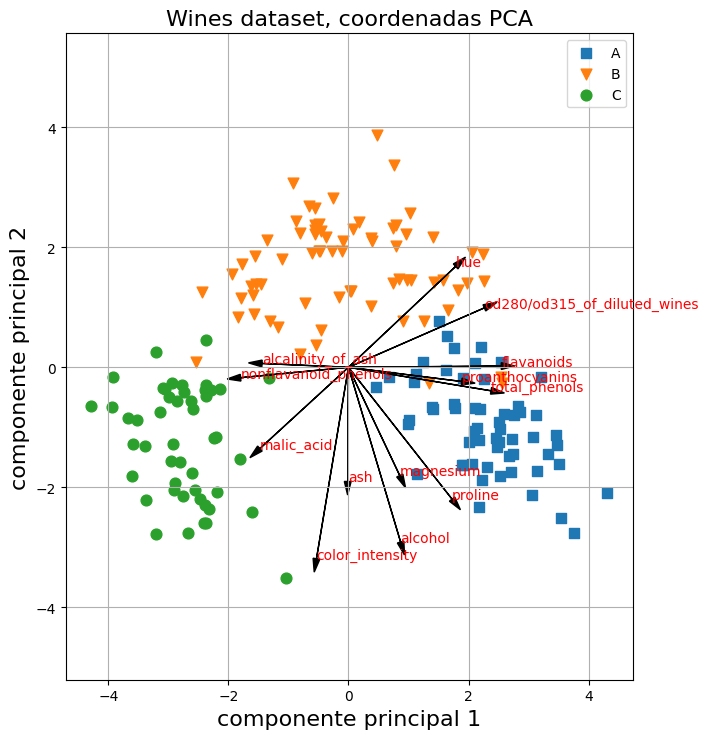

In [17]:
fig = plt.figure(figsize=(7,7))
ax = plt.subplot(1,1,1)
PCA_plot(X_std, y, attribute_names, classes_names,
         colors, markers, pca, pcs_names, ax, pc_x=0, pc_y=1)
plt.title('Wines dataset, coordenadas PCA', fontsize=16)
plt.axis('equal');

In [18]:
X_pca[0]

array([ 3.31675081, -1.44346263, -0.16573904, -0.21563119,  0.69304284,
       -0.22388013,  0.59642655,  0.06513909,  0.64144271,  1.02095585,
       -0.4515634 ,  0.54081041, -0.06623863])

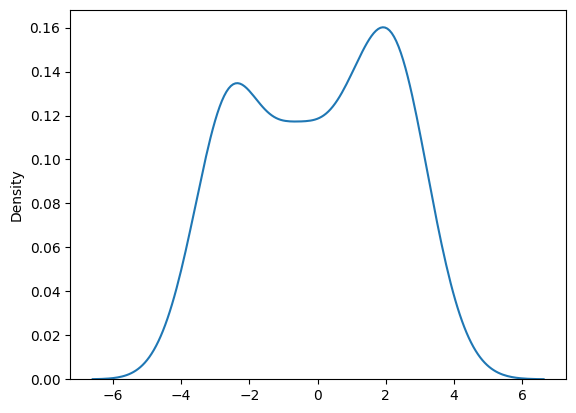

In [19]:
import seaborn as sns

sns.distplot(X_pca[:,0], hist=False);

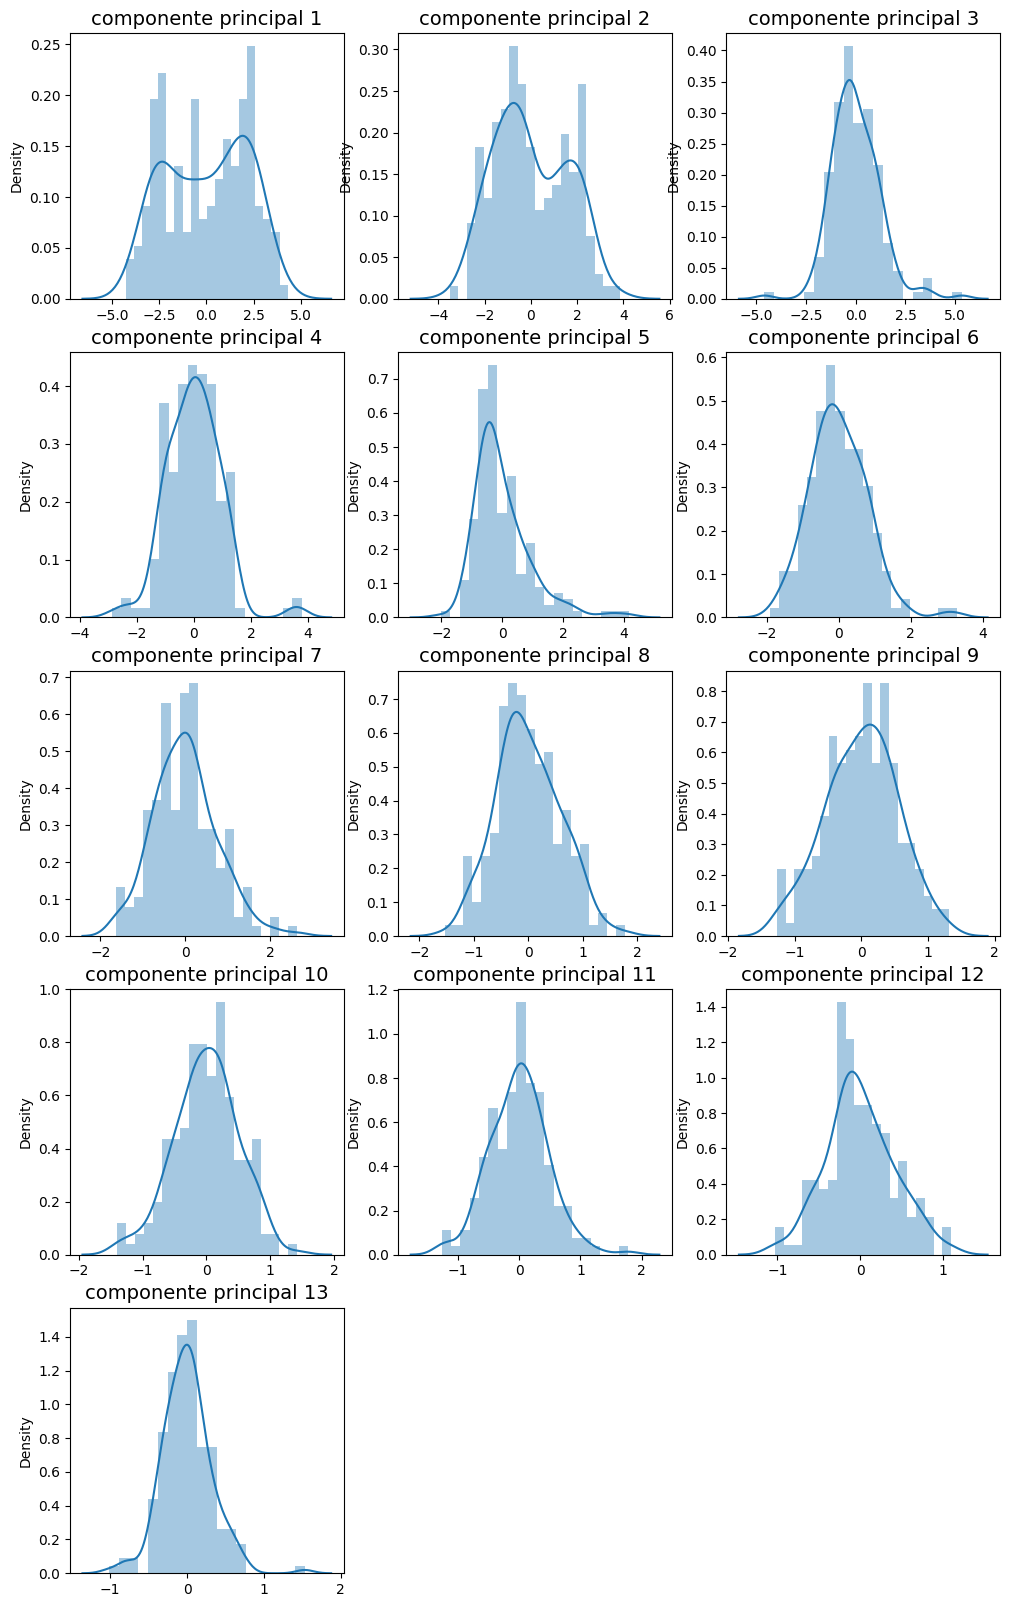

In [20]:
nrows = int(np.ceil(pca.n_components_/3))
plt.figure(figsize=(12,4*nrows))
for i in range(pca.n_components_):
    plt.subplot(nrows,3,i+1)
    sns.distplot(X_pca[:,i], bins=20)
    plt.title(pcs_names[i], fontsize=14)

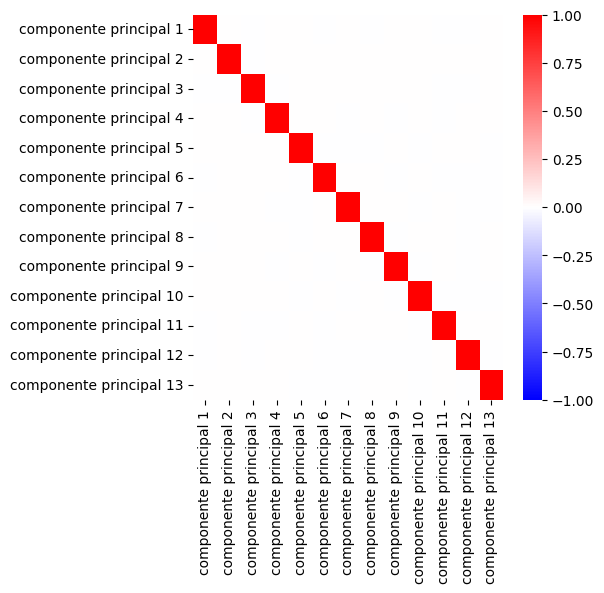

In [21]:
df_pca = pd.DataFrame(X_pca, columns=pcs_names)
plt.figure(figsize=(5,5))
sns.heatmap(df_pca.corr(), cmap="bwr", vmin=-1, vmax=1);